In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/AIML_IITG/Datasets/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.drop(columns="Unnamed: 0",axis=1)

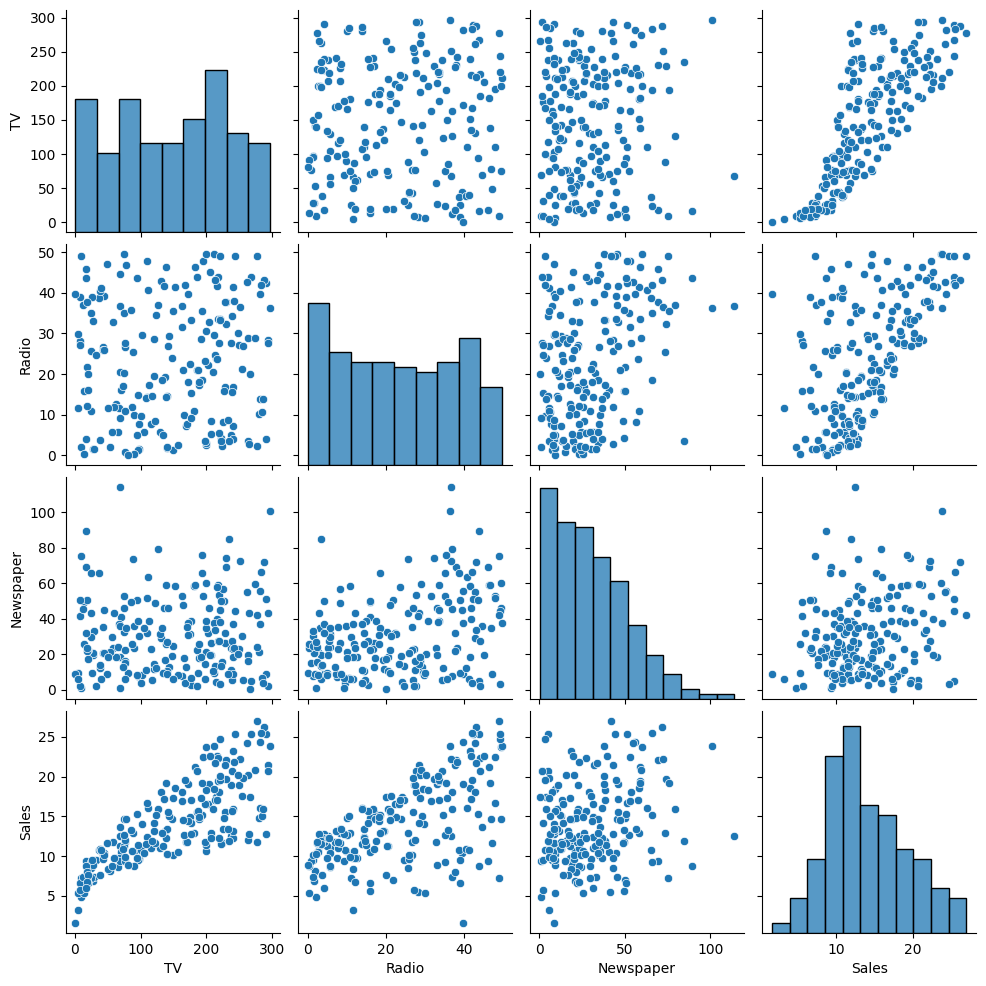

In [5]:
sns.pairplot(df)

In [6]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [7]:
sc = StandardScaler()
X = df.drop(columns="Sales",axis=1)
y = df["Sales"]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
x_tr_sc = sc.fit_transform(x_train)
x_te_sc = sc.transform(x_test)

In [10]:
model = LinearRegression()
model.fit(x_tr_sc,y_train)
model

LinearRegression()

In [11]:
model_pred = model.predict(x_te_sc)

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [13]:
MSE = mean_squared_error(y_test,model_pred)
MAE = mean_absolute_error(y_test,model_pred)
RMSE = np.sqrt(MSE)

In [14]:
MSE

3.79679723671522

In [15]:
MAE

1.5116692224549084

In [16]:
RMSE

np.float64(1.9485372043446387)

In [17]:
lasso_model = LassoCV(alphas=[0.001,0.1,0.2,0.5,0.8,1],cv=10)
lasso_model.fit(x_tr_sc,y_train)
lasso_model

LassoCV(alphas=[0.001, 0.1, 0.2, 0.5, 0.8, 1], cv=10)

In [18]:
lasso_model.alpha_

np.float64(0.001)

In [19]:
lasso_model.coef_

array([3.68240566, 2.90557457, 0.14121025])

In [20]:
lasso_pred = lasso_model.predict(x_te_sc)

In [21]:
lasso_mse = mean_squared_error(y_test,lasso_pred)
lasso_mae = mean_absolute_error(y_test,lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)

In [22]:
lasso_mae

1.5112575637382932

In [23]:
lasso_mse

3.795509338411838

In [24]:
lasso_rmse

np.float64(1.9482066980718031)

In [43]:
elastic_model = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.4,0.5,0.8,1],alphas=[0.01,0.1,1,2,4,10],cv=5)
elastic_model.fit(x_tr_sc,y_train)
elastic_model

ElasticNetCV(alphas=[0.01, 0.1, 1, 2, 4, 10], cv=5,
             l1_ratio=[0.01, 0.1, 0.2, 0.4, 0.5, 0.8, 1])

In [44]:
elastic_model.alpha_

np.float64(0.1)

In [45]:
elastic_model.l1_ratio_

np.float64(1.0)

In [37]:
elastic_model.coef_

array([0.04397345, 0.19528096, 0.00551083])

In [46]:
elastic_pred = model.predict(x_te_sc)

In [47]:
elastic_mse = mean_squared_error(y_test,elastic_pred)
elastic_mae = mean_absolute_error(y_test,elastic_pred)
elastic_rmse = np.sqrt(elastic_mse)

In [48]:
elastic_mse

3.79679723671522

In [49]:
elastic_mae

1.5116692224549084

In [50]:
elastic_rmse

np.float64(1.9485372043446387)